# Exploratory Data Analysis

## Daniel Wooten - January 21 2020

In [1]:
# Import the packages we need
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from datetime import datetime
import pytz
import re
import random
import math
import pdb
pd.set_option('display.max_columns', 50)
%matplotlib inline

In [2]:
# We will need this function later, norammly in another file, this is a notebook.

def convert_to_pyz(entry):
    """This function converts time zone entries from the base data set into time zones acceptable by pytz"""
    
    try:
        
        entry = str(entry)
        
    except:
        
        entry = 'nan'
    
    out = 'Greenwich'
    
    pattern = re.compile(r'Beijing') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Asia/Shanghai'


    pattern = re.compile(r'Central Time \(US & Canada\)') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'US/Central'


    pattern = re.compile(r'Amsterdam') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Amsterdam'


    pattern = re.compile(r'Pacific Time \(US & Canada\)') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'US/Pacific'


    pattern = re.compile(r'nan') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Greenwich'


    pattern = re.compile(r'Edinburgh') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Greenwich'


    pattern = re.compile(r'Hong Kong') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Asia/Hong_Kong'


    pattern = re.compile(r'Eastern Time \(US & Canada\)') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'US/Eastern'


    pattern = re.compile(r'Berlin') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Berlin'


    pattern = re.compile(r'Quito') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Pacific/Galapagos'


    pattern = re.compile(r'Paris') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Paris'


    pattern = re.compile(r'Athens') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Athens'


    pattern = re.compile(r'Santiago') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'America/Santiago'


    pattern = re.compile(r'La Paz') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'America/La_Paz'


    pattern = re.compile(r'Irkutsk') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Asia/Irkutsk'


    pattern = re.compile(r'Arizona') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'US/Arizona'


    pattern = re.compile(r'Atlantic Time (Canada)') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Canada/Atlantic'


    pattern = re.compile(r'Dublin') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Dublin'


    pattern = re.compile(r'London') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/London'


    pattern = re.compile(r'Madrid') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Madrid'


    pattern = re.compile(r'Brasilia') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Brazil/DeNoronha'


    pattern = re.compile(r'Osaka') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Japan'


    pattern = re.compile(r'Buenos Aires') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'America/Argentina/Buenos_Aires'


    pattern = re.compile(r'Moscow') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Moscow'


    pattern = re.compile(r'Lisbon') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Lisbon'


    pattern = re.compile(r'Tokyo') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Japan'


    pattern = re.compile(r'Kuala Lumpur') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Asia/Kuala_Lumpur'


    pattern = re.compile(r'Caracas') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'America/Caracas'


    pattern = re.compile(r'Jakarta') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Asia/Jakarta'


    pattern = re.compile(r'Abu Dhabi') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Asia/Dubai'


    pattern = re.compile(r'Bangkok') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Asia/Bangkok'


    pattern = re.compile(r'Casablanca') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Africa/Casablanca'


    pattern = re.compile(r'Hawaii') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'US/Hawaii'


    pattern = re.compile(r'Mexico City') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'America/Mexico_City'


    pattern = re.compile(r'Mountain Time \(US & Canada\)') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'US/Mountain'


    pattern = re.compile(r'Baghdad') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Asia/Baghdad'


    pattern = re.compile(r'Belgrade') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Belgrade'


    pattern = re.compile(r'Copenhagen') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Copenhagen'


    pattern = re.compile(r'Rome') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Rome'


    pattern = re.compile(r'Tehran') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Asia/Tehran'


    pattern = re.compile(r'Lima') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'America/Lima'


    pattern = re.compile(r'Sydney') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Australia/Sydney'


    pattern = re.compile(r'Helsinki') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Helsinki'


    pattern = re.compile(r'Tbilisi') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Asia/Tbilisi'


    pattern = re.compile(r'Alaska') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'US/Alaska'


    pattern = re.compile(r'Sapporo') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Japan'


    pattern = re.compile(r'Bern') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Zurich'


    pattern = re.compile(r'Sofia') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Sofia'


    pattern = re.compile(r'Jerusalem') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Asia/Jerusalem'


    pattern = re.compile(r'West Central Africa') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Africa/Khartoum'


    pattern = re.compile(r'Brussels') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Brussels'


    pattern = re.compile(r'Ekaterinburg') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Kaliningrad'


    pattern = re.compile(r'Istanbul') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Istanbul'


    pattern = re.compile(r'Bogota') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'America/Bogota'


    pattern = re.compile(r'Singapore') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Asia/Singapore'


    pattern = re.compile(r'International Date Line West') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Pacific/Auckland'


    pattern = re.compile(r'Pretoria') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Africa/Johannesburg'


    pattern = re.compile(r'Greenland') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'America/Godthab'


    pattern = re.compile(r'Central America') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'US/Central'


    pattern = re.compile(r'Melbourne') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Australia/Lord_Howe'


    pattern = re.compile(r'Novosibirsk') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Kaliningrad'


    pattern = re.compile(r'Warsaw') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Warsaw'


    pattern = re.compile(r'Perth') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Australia/Perth'


    pattern = re.compile(r'Stockholm') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Stockholm'


    pattern = re.compile(r'Monterrey') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'America/Mexico_City'


    pattern = re.compile(r'Minsk') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Minsk'


    pattern = re.compile(r'America/Chicago') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'US/Central'


    pattern = re.compile(r'Vienna') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Vienna'


    pattern = re.compile(r'Europe/London') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/London'


    pattern = re.compile(r'Brisbane') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Australia/Brisbane'


    pattern = re.compile(r'Kyiv') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Kiev'


    pattern = re.compile(r'Seoul') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Asia/Seoul'


    pattern = re.compile(r'Harare') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Africa/Harare'


    pattern = re.compile(r'Azores') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Atlantic/Azores'


    pattern = re.compile(r'Mid-Atlantic') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'US/Eastern'


    pattern = re.compile(r'Bratislava') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Bratislava'


    pattern = re.compile(r'Yakutsk') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Asia/Yakutsk'


    pattern = re.compile(r'Mumbai') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Asia/Calcutta'


    pattern = re.compile(r'Saskatchewan') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Canada/Saskatchewan'


    pattern = re.compile(r'Guadalajara') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'US/Central'


    pattern = re.compile(r'Auckland') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Pacific/Auckland'


    pattern = re.compile(r'Ljubljana') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Ljubljana'


    pattern = re.compile(r'Adelaide') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Australia/Adelaide'


    pattern = re.compile(r'Canberra') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Australia/Canberra'


    pattern = re.compile(r'Chihuahua') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'America/Chihuahua'


    pattern = re.compile(r'Taipei') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Asia/Taipei'


    pattern = re.compile(r'Budapest') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Budapest'


    pattern = re.compile(r'Kathmandu') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Asia/Kathmandu'


    pattern = re.compile(r'Islamabad') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Asia/Karachi'


    pattern = re.compile(r'America/New_York') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'US/Eastern'


    pattern = re.compile(r'Prague') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Prague'


    pattern = re.compile(r'America/Sao_Paulo') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'America/Sao_Paulo'


    pattern = re.compile(r'Almaty') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Asia/Almaty'


    pattern = re.compile(r'Cairo') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Africa/Cairo'


    pattern = re.compile(r'Pacific/Guam') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Pacific/Guam'


    pattern = re.compile(r'New Delhi') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Asia/Calcutta'


    pattern = re.compile(r'Astana') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Asia/Almaty'


    pattern = re.compile(r'Riga') 
    match = pattern.match(entry) 
    if match is not None:
        out = 'Europe/Riga'


    
    return(out)
    

In [3]:
# read in the ras file and convert it to a pandas csv, then close this file
raw_seq_train = open('/home/dwooten/Documents/insight/data/splits/sequence/train_SEQ.csv','r')

In [4]:
seq_train = pd.read_csv(raw_seq_train, sep=',', header=0, index_col=False)

In [5]:
raw_seq_train.close()

In [6]:
# Let's start looking around!
seq_train.sample(10)

,user_id,track_id,hashtag,created_at,score,lang,tweet_lang,time_zone,instrumentalness,liveness,speechiness,danceability,valence,loudness,tempo,acousticness,energy,mode,key,rating,current_track,previous_track
115512,308580291,6f5b4967fe92cc31ad7031cc0b40e591,np,2014-06-25 18:01:26,0.675000,nl,en,Amsterdam,0.019600,0.0737,0.0521,0.728,0.590,-8.801,129.026,0.184000,0.728,1.0,2.0,1,6f5b4967fe92cc31ad7031cc0b40e591,279140b9305b5247ab8f07b0993027dd
220604,278691053,dd5ab99e3a6619d37abcff464d45ab9f,like,2014-07-23 07:12:04,0.771875,de,en,NaN,0.390000,0.1040,0.0512,0.721,0.951,-7.699,127.006,0.001260,0.728,0.0,10.0,1,dd5ab99e3a6619d37abcff464d45ab9f,549579f50c77ed2e8c8b9326c8daa56e
171551,1617892824,acca7456f99b4699871d3fe249e5fe11,np,2014-04-07 07:00:01,0.675000,en,en,Berlin,0.000000,0.1350,0.1390,0.636,0.329,-9.524,84.804,0.112000,0.436,1.0,7.0,1,acca7456f99b4699871d3fe249e5fe11,b9fa88d18f7dda845789155d69177df0
119574,308580291,c81c09b27ee1bb6ecf0a5dbd9c2364d8,np,2014-07-29 11:56:34,0.675000,nl,en,Amsterdam,0.000427,0.0807,0.0513,0.752,0.810,-5.273,110.142,0.005600,0.879,0.0,10.0,1,c81c09b27ee1bb6ecf0a5dbd9c2364d8,15ca43fca28b70a639cc1c3f2eb72521
215244,160874621,addc364df8649d91eb69b709cd1829c3,gossip,2014-06-05 02:42:48,0.270833,de,en,Berlin,0.087300,0.1080,0.0288,0.670,0.777,-5.700,124.998,0.001720,0.798,0.0,10.0,1,addc364df8649d91eb69b709cd1829c3,9b9adb5f4e4febc7d11e70bfbaf10fde
170158,126040912,5b488c529540d9dbc85c4f603ee1dbf5,craveradio,2014-09-21 01:35:51,0.300000,en,fr,Eastern Time (US & Canada),0.000000,0.0399,0.0389,0.742,0.962,-3.697,128.981,0.036400,0.803,1.0,9.0,1,5b488c529540d9dbc85c4f603ee1dbf5,885f834fa86ac9077729e13db3a1fd73
80133,1083272065,df761cacba1a08afad4d3187e646a8a0,urbantraxxradio,2014-04-26 15:01:10,0.700000,nl,en,Amsterdam,0.000000,0.6020,0.0563,0.577,0.113,-6.299,133.973,0.014300,0.576,1.0,2.0,1,df761cacba1a08afad4d3187e646a8a0,df761cacba1a08afad4d3187e646a8a0
269,823214346,4930e1dc6592873414153809b52c94b1,kiss92,2014-01-02 05:29:01,0.800000,en,en,Beijing,0.000005,0.1030,0.0374,0.640,0.260,-9.432,176.086,0.509000,0.433,1.0,5.0,1,4930e1dc6592873414153809b52c94b1,acca7456f99b4699871d3fe249e5fe11
59127,81496937,12ca61c3e344cc6e2cfd135cf67950a8,deathrock,2014-06-16 18:16:31,0.190625,en,en,Central Time (US & Canada),0.731000,0.0766,0.0295,0.631,0.465,-7.667,118.185,0.000593,0.900,0.0,3.0,1,12ca61c3e344cc6e2cfd135cf67950a8,5a9636026565503724e2d5ad19767158
192744,1901627161,5c24009123b7434b98b14bb710badc4c,rock,2014-03-09 15:11:55,0.700000,en,en,NaN,0.246000,0.5640,0.0424,0.604,0.470,-4.308,123.996,0.000107,0.950,1.0,5.0,1,5c24009123b7434b98b14bb710badc4c,98ee3b6e02cc4caa04f52bd963841d3e


It's got the right number of columns and looks well formatted, it should be, this was a data set put out for benchmarking! Let's take a quick tour of the data fields

Here, let's engineer some basic time features

In [7]:
seq_train.user_id = seq_train.user_id.astype('category')

In [8]:
seq_train.user_id.describe()

count        253030
unique         1830
top       823214346
freq          41378
Name: user_id, dtype: int64

In [9]:
seq_train['full_date']=pd.to_datetime(seq_train.created_at)

In [10]:
seq_train.full_date.describe()

count                  253030
unique                 211537
top       2014-07-24 20:15:23
freq                        9
first     2014-01-01 05:54:21
last      2014-09-30 23:57:44
Name: full_date, dtype: object

In [11]:
seq_train.time_zone.describe()

count                         232003
unique                            97
top       Central Time (US & Canada)
freq                           50061
Name: time_zone, dtype: object

In [12]:
seq_train['zoned'] = seq_train.time_zone.apply(lambda x: convert_to_pyz(x))

In [13]:
seq_train.zoned.describe()

count         253030
unique            83
top       US/Central
freq           50097
Name: zoned, dtype: object

In [14]:
seq_train.zoned.sample(5)

181512          US/Eastern
88358     Europe/Amsterdam
40013        Asia/Shanghai
146521           Greenwich
57043           US/Central
Name: zoned, dtype: object

In [15]:
seq_train['zone_objects'] = seq_train.zoned.apply(lambda x: pytz.timezone(x))

In [16]:
seq_train['aware'] = seq_train.apply(lambda row: row.zone_objects.localize(row.full_date) , axis = 1)

In [17]:
seq_train['aware'] = seq_train.aware.apply(lambda x: x.astimezone('utc'))

In [18]:
seq_train['day_w']=seq_train.aware.apply(lambda x: int(x.strftime('%w')))

In [19]:
seq_train.day_w.describe()

count    253030.000000
mean          2.981935
std           2.004771
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: day_w, dtype: float64

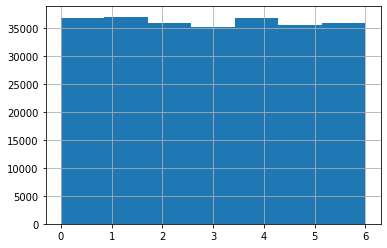

In [20]:
seq_train.day_w.hist(bins=7)

This is surprising, evenly distributed data across the week - this must be a currated result

In [21]:
seq_train.day_w.sample(5)

32795     3
136873    2
92014     1
16353     6
136794    2
Name: day_w, dtype: int64

In [22]:
seq_train['day_m']=seq_train.aware.apply(lambda x: int(x.strftime('%d')))

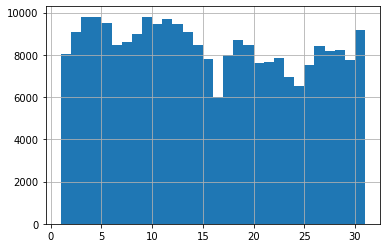

In [23]:
seq_train.day_m.hist(bins=30)

In [24]:
seq_train['hour_d']=seq_train.aware.apply(lambda x: int(x.strftime('%H')))

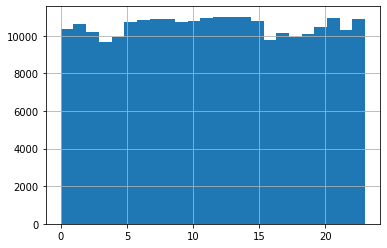

In [25]:
seq_train.hour_d.hist(bins=24)

Absolutely a currated data set, 

In [26]:
seq_train.score.describe()

count    253030.000000
mean          0.512384
std           0.305385
min           0.000000
25%           0.200000
50%           0.675000
75%           0.766667
max           1.000000
Name: score, dtype: float64

In [27]:
seq_train.track_id.unique()[1]

'cc1a46ee0446538ecf6b65db01c30cd8'

How many NaNs do we have?

In [28]:
seq_train = seq_train.drop(axis=1,columns=['time_zone', 'lang', 'full_date', 'zone_objects'])

In [29]:
seq_train['null'] = seq_train.liveness.apply(lambda x: 0)

In [30]:
seq_train['null'] = seq_train.apply(lambda x: sum(x.isnull().values.astype('int')), axis = 1)

In [31]:
seq_train.null.describe()

count    253030.000000
mean          0.000190
std           0.040449
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: null, dtype: float64

In [32]:
seq_train.null = seq_train.null.apply(lambda x: 1 if x > 0 else 0)

In [33]:
seq_train.null.sum()

6

We've only got 6 rows with bad data, let's see what's going on

Alrighty, so one track from each of these users doesnt have the Spotify API data

In [34]:
seq_train = seq_train.dropna()

In [35]:
seq_train = seq_train.drop(axis=1,columns=['null'])

Now, for metrics which the model will use, we need the average (and the standard deviation of the distribution ) of the Euclidean distances between all of a users songs where the distance is taken from the 11 dimensional spotify phase space

First though, to get a fair distance, we need to normalize our factors

In [36]:
seq_train.sample(1)

,user_id,track_id,hashtag,created_at,score,tweet_lang,instrumentalness,liveness,speechiness,danceability,valence,loudness,tempo,acousticness,energy,mode,key,rating,current_track,previous_track,zoned,aware,day_w,day_m,hour_d
68807,81496937,2424f31a8a671fa679a12fce2524088a,postpunk,2014-08-15 11:16:38,0.0,en,0.85,0.738,0.0584,0.246,0.0211,-13.994,69.268,0.964,0.974,0.0,4.0,1,2424f31a8a671fa679a12fce2524088a,2424f31a8a671fa679a12fce2524088a,US/Central,2014-08-15 16:16:38+00:00,5,15,16


In [37]:
score_a = np.average(seq_train.score.values)
score_s = np.std(seq_train.score.values)
instrumentalness_a = np.average(seq_train.instrumentalness.values)
instrumentalness_s = np.std(seq_train.instrumentalness.values)
liveness_a = np.average(seq_train.liveness.values)
liveness_s = np.std(seq_train.liveness.values)
speechiness_a = np.average(seq_train.speechiness.values)
speechiness_s = np.std(seq_train.speechiness.values)
danceability_a = np.average(seq_train.danceability.values)
danceability_s = np.std(seq_train.danceability.values)
valence_a = np.average(seq_train.valence.values)
valence_s = np.std(seq_train.valence.values)
loudness_a = np.average(seq_train.loudness.values)
loudness_s = np.std(seq_train.loudness.values)
tempo_a = np.average(seq_train.tempo.values)
tempo_s = np.std(seq_train.tempo.values)
acousticness_a = np.average(seq_train.acousticness.values)
acousticness_s = np.std(seq_train.acousticness.values)
energy_a = np.average(seq_train.energy.values)
energy_s = np.std(seq_train.energy.values)

In [38]:
seq_train.score = seq_train.score.apply(lambda x: (x - score_a) / score_s)
seq_train.instrumentalness = seq_train.instrumentalness.apply(lambda x: (x - instrumentalness_a) / instrumentalness_s)
seq_train.liveness = seq_train.liveness.apply(lambda x: (x - liveness_a) / liveness_s)
seq_train.speechiness = seq_train.speechiness.apply(lambda x: (x - speechiness_a) / speechiness_s)
seq_train.danceability = seq_train.danceability.apply(lambda x: (x - danceability_a) / danceability_s)
seq_train.valence = seq_train.valence.apply(lambda x: (x - valence_a) / valence_s)
seq_train.loudness = seq_train.loudness.apply(lambda x: (x - loudness_a) / loudness_s)
seq_train.tempo = seq_train.tempo.apply(lambda x: (x - tempo_a) / tempo_s)
seq_train.acousticness = seq_train.acousticness.apply(lambda x: (x - acousticness_a) / acousticness_s)
seq_train.energy = seq_train.energy.apply(lambda x: (x - energy_a) / energy_s)

In [39]:
seq_train.sample(1)

,user_id,track_id,hashtag,created_at,score,tweet_lang,instrumentalness,liveness,speechiness,danceability,valence,loudness,tempo,acousticness,energy,mode,key,rating,current_track,previous_track,zoned,aware,day_w,day_m,hour_d
126204,308580291,c80cec991c61d54779467d12eafdfdc6,np,2014-09-25 17:44:30,0.532485,en,-0.525395,-0.468841,-0.381418,-0.694105,-1.377431,-2.049992,-0.637002,0.234811,-0.791592,0.0,0.0,1,c80cec991c61d54779467d12eafdfdc6,a714fa6b4a9de71a820eb86c982716ad,Europe/Amsterdam,2014-09-25 15:44:30+00:00,4,25,15


In [40]:
seq_train['avg'] = 0
seq_train['sd'] = 0

In [41]:
seq_train.to_pickle('/home/dwooten/Documents/insight/data/pickup.pk')

In [42]:
restart = pd.read_pickle('/home/dwooten/Documents/insight/data/pickup.pk')

In [43]:
def get_user_metrics(df):
    """This function returns the average and standard deviation of the distances between all of a users songs
    as measured by the 11 dimensional spotify space"""
        
    for user in df.user_id.unique():

        d_array = np.zeros(len(df[df.user_id == user].track_id.unique())**2)

        df_user = df[df.user_id == user]
        
        # Just as in the agent class, here we drop liveness, key, mode, and rating
        
        track_array = df_user.drop_duplicates('track_id').loc[:,['instrumentalness','speechiness','danceability','valence','loudness','tempo','acousticness','energy']].values
        
        start = 0
                
        for i in range(track_array.shape[0]):
            
            a = np.sqrt(np.sum(np.power((track_array - track_array[i]),2), axis = 1))
            
            d_array[start:(start + track_array.shape[0])] = a
            
            i += 1
            
            start = start + track_array.shape[0]

        df.loc[df.user_id == user, 'avg'] = np.average(d_array)

        df.loc[df.user_id == user, 'sd'] = np.std(d_array)
    

In [44]:
get_user_metrics(restart)

In [45]:
restart.rating.describe()

count    253024.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: rating, dtype: float64

In [46]:
restart.sd.describe()

count    253024.000000
mean          1.322721
std           0.210951
min           0.000000
25%           1.220916
50%           1.296225
75%           1.394226
max           4.792794
Name: sd, dtype: float64

Here I reduce 8 of the numeric song vectors into a lower order set of 4

In [47]:
factors = restart.loc[:,['instrumentalness','speechiness','danceability','valence','loudness','tempo','acousticness','energy']].values

In [48]:
for i in range(2,8):
    pca = PCA(n_components = i, whiten = True)
    sample =pca.fit_transform(factors)
    print(sum(pca.explained_variance_ratio_))

0.4778608610029545
0.6031694426048275
0.7219338664440349
0.8360661895210812
0.912914185631764
0.9711867725854835


In [49]:
pca = PCA(n_components=6, whiten = True)

In [50]:
reduced = pca.fit_transform(factors)

In [51]:
restart = restart.rename(columns={'key':'k', 'mode' : 'm'})

In [52]:
tmp = pd.DataFrame(data = reduced, columns = ['r0', 'r1', 'r2','r3','r4', 'r5'])

In [53]:
tmp.r0.values

array([-0.42728962, -0.50939393, -1.04577366, ..., -0.05860191,
       -1.16708666, -0.62472458])

In [54]:
restart = pd.concat([restart, tmp], axis = 1)

We're going to need to store and keep the means of these new vectors

In [55]:
restart.sample()

,user_id,track_id,hashtag,created_at,score,tweet_lang,instrumentalness,liveness,speechiness,danceability,valence,loudness,tempo,acousticness,energy,m,k,rating,current_track,previous_track,zoned,aware,day_w,day_m,hour_d,avg,sd,r0,r1,r2,r3,r4,r5
70505,81496937,f0cfb4f4ebfad1da0190c99773c93c5b,postpunk,2014-08-25 19:55:30,-1.677844,en,2.079999,0.829422,3.993822,-0.642685,-1.041786,0.672421,0.080007,-0.540402,1.467021,0.0,6.0,1.0,f0cfb4f4ebfad1da0190c99773c93c5b,f0cfb4f4ebfad1da0190c99773c93c5b,US/Central,2014-08-26 00:55:30+00:00,2.0,26.0,0.0,3.757302,1.394226,-1.086802,1.083715,1.932672,1.848462,3.603073,-1.459905


In [56]:
restart.to_pickle('/home/dwooten/Documents/insight/data/clean.pk')

In [103]:
restart = pd.read_pickle('/home/dwooten/Documents/insight/data/clean.pk')

In [104]:
users = restart.user_id.unique()

In [105]:
len_users = [restart[restart.user_id == x].shape[0] for x in users]

In [106]:
len_users.index(5)

659

Users with fewer than 4 songs simply aren't helpful

In [107]:
user_len_dict = dict(zip(users, len_users))

In [108]:
mask = [True if user_len_dict[x] > 4 else False for x in restart.user_id.to_list()]

In [109]:
trimmed = restart[mask]

In [110]:
trimmed = trimmed.dropna()

In [111]:
kmeans = KMeans(n_clusters=10).fit(trimmed.loc[:,['r0', 'r1', 'r2','r3','r4', 'r5']])

In [112]:
np.isnan(kmeans.labels_).any()

False

In [113]:
km = pd.DataFrame(kmeans.labels_, columns=['cluster'])

In [114]:
km.shape

(251084, 1)

In [115]:
trimmed.shape

(251084, 33)

In [116]:
np.isnan(km.cluster.values).any()

False

In [117]:
trimmed = pd.concat((trimmed, km), axis = 1)

In [118]:
trimmed.sample()

,user_id,track_id,hashtag,created_at,score,tweet_lang,instrumentalness,liveness,speechiness,danceability,valence,loudness,tempo,acousticness,energy,m,k,rating,current_track,previous_track,zoned,aware,day_w,day_m,hour_d,avg,sd,r0,r1,r2,r3,r4,r5,cluster
90540,1083272065,2ab6557b1e2559cb2d07d7171d3f3cca,urbantraxxradio,2014-08-15 18:52:07,0.614349,en,-0.530494,-0.410125,-0.166645,1.654088,-0.119774,-0.070607,-0.916921,-0.526982,-0.920803,1.0,1.0,1.0,2ab6557b1e2559cb2d07d7171d3f3cca,1827a1398750b0210f5f2394eb56fe47,Europe/Amsterdam,2014-08-15 16:52:07+00:00,5.0,15.0,16.0,3.597171,1.597221,0.330467,-1.211423,-0.139914,-0.605621,0.385268,0.801137,1.0


In [119]:
np.isnan(trimmed.cluster.values).any()

True

In [120]:
np.sum(np.isnan(trimmed.cluster.values))

4

Rude ^

In [101]:
trimmed = trimmed.dropna()

In [102]:
trimmed.to_pickle('/home/dwooten/Documents/insight/data/trimmed.pk')

In [77]:
np.isnan(trimmed.cluster.values).any()

False

In [82]:
trimmed.shape

(251080, 34)